In [2]:
%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import context

import matplotlib.pyplot as plt
%matplotlib inline

from functools import reduce
import statistics
import numpy as np


import logging.config
logging.config.fileConfig('../../logging.ini', disable_existing_loggers=False)

LINKS_PATH = r'D:\Datasets\enwiki-20190601-categorylinks.sql'


In [4]:
from cat2vec.graph.raw_dump_loader import load_categories_per_article
pages_links = load_categories_per_article(LINKS_PATH)



2019-08-25 22:47:13,545 - cat2vec.graph.raw_dump_loader - INFO - Loading page to category links
2019-08-25 22:47:13,546 - cat2vec.graph.raw_dump_loader - INFO - Parsing categorylinks.sql
2019-08-25 22:51:25,968 - cat2vec.graph.raw_dump_loader - INFO - categorylinks.sql parsed. Total links loaded: 120420420


In [5]:
# nodes (categories), edges, articles
print('Number of articles: ', len(pages_links))



Number of articles:  21476635


In [6]:
categories_per_articles = list(pages_links.values())
print('Statistic for categories per articles:')
print('\tmean:', statistics.mean(categories_per_articles))
print('\tmedian:', statistics.median(categories_per_articles))
print('\t(population)std_dev:', statistics.pstdev(categories_per_articles))
print('\t99th percentile: ', np.percentile(categories_per_articles, 99))


Statistic for categories per articles:
	mean: 5.607043189028449
	median: 4
	(population)std_dev: 5.603571408971185
	99th percentile:  26.0


In [8]:
print('\t99th percentile: ', np.percentile(categories_per_articles, 90))



	99th percentile:  13.0


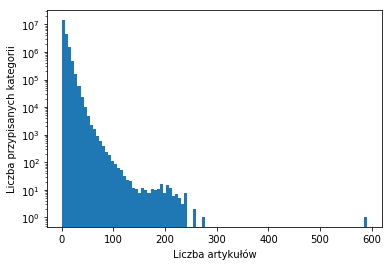

In [7]:
plt.hist(categories_per_articles, log = True, bins=100)
plt.xlabel('Liczba artykułów')
plt.ylabel('Liczba przypisanych kategorii')
plt.savefig('full_articles_categories.png')
plt.show()
